<a href="https://colab.research.google.com/github/Koftarik/Data_Processing_and_Machine_Learning/blob/main/2_0_opencv_and_face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Знакомство с библиотекой opencv и распознаванием лица на видео по фотографии. Программа должна распознать лицо с фотографии на видеозаписи, обвести обнаруженное лицо рамкой, подписать и сохранить это в новый видеофайл. В конце программы к исходной фотографии применяются фильтры из opencv.

In [ ]:
!pip3 install -U opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 10.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.6.0.66
    Uninstalling opencv-python-4.6.0.66:
      Successfully uninstalled opencv-python-4.6.0.66


In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [ ]:
!pip install git+https://github.com/ageitgey/face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ageitgey/face_recognition to /tmp/pip-req-build-sabjtdc7
  Running command git clone --filter=blob:none --quiet https://github.com/ageitgey/face_recognition /tmp/pip-req-build-sabjtdc7
  Resolved https://github.com/ageitgey/face_recognition to commit 2e2dccea9dd0ce730c8d464d0f67c6eebb40c9d1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition: filename=face_recognition-1.4.0-py2.py3-none-any.whl size=15689 sha256=e9163a73c1ef67d1ee684d9a724484adc480a30d8daa3d32ad46fbb3df864632
  Stored in directory: /tmp/pip-ephem-wheel-cache-uxs_g__9/wheels/45/32/33/2a34654c9e90b889acb0380aacdcf900d1594215aa4a63ad22
  Created wheel for fac

In [ ]:
import face_recognition
import cv2
import numpy as np

In [ ]:
#путь к входному видео
input_video_path = "video1.mp4"
#путь к выходному видео
output_video_path = 'output.avi'
#разрешение выходного видео
output_video_res = (1280, 720)
#пример вашего фото для распознования на видео
your_photo_path1 = "face1.jpg"
#Как подписывать ваше лицо на видео
sign_under_detected_photo1 = "Alexander"


In [ ]:
# открываем наше видео
input_movie = cv2.VideoCapture(input_video_path)
length = int(input_movie.get(cv2.CAP_PROP_FRAME_COUNT))

In [ ]:
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_movie = cv2.VideoWriter(output_video_path, fourcc, 10.11, output_video_res)

image1 = face_recognition.load_image_file(your_photo_path1)
face_encoding1 = face_recognition.face_encodings(image1)[0]

known_faces1 = [
    face_encoding1
]

# Немного переменных
face_locations = []
face_encodings = []
face_names = []
frame_number = 0

while True:
    # Берем отдельный кадр видео
    ret, frame = input_movie.read()
    frame_number += 1

    # Если кадры кончились, то завершаем цикл
    if not ret:
        break

    # Преобразовываем каждый кадр из BGR -> RGB (особенности работы opencv)
    rgb_frame = frame[:, :, ::-1]

    # Находим все лица на текущем кадре
    face_locations = face_recognition.face_locations(rgb_frame)
    face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)

    face_names = []
    print(len(face_locations))
    for face_encoding in face_encodings:
        # Проверяем, есть ли наше лицо среди найденных
        match1 = face_recognition.compare_faces(known_faces1, face_encoding, tolerance=0.50)
        # Если есть, то присваиваем переменной нужную подпись
        name = None
        if match1[0]:
            name = sign_under_detected_photo1

        face_names.append(name)

    # Подписываем результат
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        if not name:
            continue

        color = (0,0,255)
        if name == sign_under_detected_photo1:
            color = (255,0,0)

        # Обводим лицо рамочкой красного цвета
        cv2.rectangle(frame, (left, top), (right, bottom), color, 2)

        # Рисуем квадрат с подписью на кадре
        cv2.rectangle(frame, (left, bottom - 25), (right, bottom), color, cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 0.5, (255, 255, 255), 1)

    # Записываем текущий кадр в наше видео
    print("Writing frame {} / {}".format(frame_number, length))
    output_movie.write(frame)

1
Writing frame 1 / 72
1
Writing frame 2 / 72
1
Writing frame 3 / 72
1
Writing frame 4 / 72
1
Writing frame 5 / 72
1
Writing frame 6 / 72
1
Writing frame 7 / 72
1
Writing frame 8 / 72
1
Writing frame 9 / 72
1
Writing frame 10 / 72
1
Writing frame 11 / 72
1
Writing frame 12 / 72
1
Writing frame 13 / 72
1
Writing frame 14 / 72
1
Writing frame 15 / 72
1
Writing frame 16 / 72
1
Writing frame 17 / 72
1
Writing frame 18 / 72
1
Writing frame 19 / 72
1
Writing frame 20 / 72
1
Writing frame 21 / 72
1
Writing frame 22 / 72
1
Writing frame 23 / 72
1
Writing frame 24 / 72
1
Writing frame 25 / 72
1
Writing frame 26 / 72
1
Writing frame 27 / 72
1
Writing frame 28 / 72
1
Writing frame 29 / 72
1
Writing frame 30 / 72
1
Writing frame 31 / 72
1
Writing frame 32 / 72
1
Writing frame 33 / 72
1
Writing frame 34 / 72
1
Writing frame 35 / 72
1
Writing frame 36 / 72
1
Writing frame 37 / 72
1
Writing frame 38 / 72
1
Writing frame 39 / 72
1
Writing frame 40 / 72
1
Writing frame 41 / 72
1
Writing frame 42 / 72
1

In [ ]:
# скачиваем получившееся видео.
from google.colab import files
files.download('output.avi')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

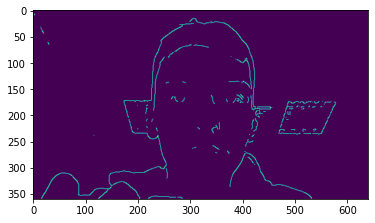

In [ ]:
# Читаем картинку из файла.
img = cv2.imread('face1.jpg')
# Для отображения в Matplotlib сконвертируем BGR в RGB.
img = cv2.resize(img, (img.shape[1]//2,img.shape[0]//2))
img = cv2.GaussianBlur(img,(9,9),0)
#img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img=cv2.Canny(img,90,90)
plt.plot()
plt.imshow(img)

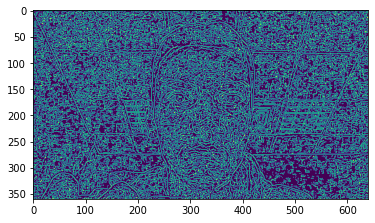

In [ ]:
# Читаем картинку из файла.
img = cv2.imread('face1.jpg')
# Для отображения в Matplotlib сконвертируем BGR в RGB.
img = cv2.resize(img, (img.shape[1]//2,img.shape[0]//2))
#img = cv2.GaussianBlur(img,(9,9),0)
#img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img=cv2.Canny(img,10,10)
plt.plot()
plt.imshow(img)

Необходимо разработать программу, детектирующую движение в видеопотоке. Требуется получить доступ к видеопотоку и получать очередные кадры из него. Необходимо получить зоны движения в видеопотоке и корректно определить тип движения в потоке. Написанная работоспособная программа должна обрабатывать не менее двух кадров в секунду.


In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [ ]:
cap = cv2.VideoCapture("video.mp4"); #вывод кадров из видео файла
#cap = cv2.VideoCapture(0); # видео поток с веб камеры

cap.set(3,1280) # установка размера окна
cap.set(4,700)

ret, frame1 = cap.read()
ret, frame2 = cap.read()

output_video_path = 'output.avi'
output_video_res = (1280, 720)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_movie = cv2.VideoWriter(output_video_path, fourcc, 30.0, output_video_res)

while cap.isOpened(): # метод isOpened() выводит статус видеопотока
  if (frame1 is None) or (frame2 is None):
    break
  diff = cv2.absdiff(frame1, frame2) # нахождение разницы двух кадров, которая проявляется лишь при изменении одного из них, т.е. с этого момента наша программа реагирует на любое движение.

  gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY) # перевод кадров в черно-белую градацию

  blur = cv2.GaussianBlur(gray, (5, 5), 0) # фильтрация лишних контуров

  _, thresh = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY) # метод для выделения кромки объекта белым цветом

  dilated = cv2.dilate(thresh, None, iterations = 3) # данный метод противоположен методу erosion(), т.е. эрозии объекта, и расширяет выделенную на предыдущем этапе область


  сontours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # нахождение массива контурных точек


  for contour in сontours:
    (x, y, w, h) = cv2.boundingRect(contour) # преобразование массива из предыдущего этапа в кортеж из четырех координат

    # метод contourArea() по заданным contour точкам, здесь кортежу, вычисляет площадь зафиксированного объекта в каждый момент времени, это можно проверить
    print(cv2.contourArea(contour))

    if cv2.contourArea(contour) < 700: # условие при котором площадь выделенного объекта меньше 700 px
      continue
    cv2.rectangle(frame1, (x, y), (x+w, y+h), (0, 255, 0), 2) # получение прямоугольника из точек кортежа
    cv2.putText(frame1, "Status: {}".format("Dvigenie"), (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3, cv2.LINE_AA) # вставляем текст

  #cv2.drawContours(frame1, сontours, -1, (0, 255, 0), 2) также можно было просто нарисовать контур объекта

 # cv2.imshow("frame1", frame1)
  frame1 = frame2  #
  ret, frame2 = cap.read() #

  #if cv2.waitKey(40) == 27:
  #  break




cap.release()
cv2.destroyAllWindows()

48.5
48.0
69.0
60.0
49.0
684.0
36.0
55.0
48.5
56.0
2024.0
187.5
152.5
134.5
75.0
2682.5
1594.5
62.5
49.0
42.0
36.0
48.5
44858.5
11.5
7.0
2.0
2.0
2.0
2.0
2.0
2110.5
2.0
5.5
31.5
27.0
2.0
42.0
48.0


In [ ]:
import cv2

from dotenv import load_dotenv
from vidstab import VidStab

if __name__ == "__main__":
    import os
    import cv2
    from vidstab import VidStab, layer_overlay, download_ostrich_video

    # Download test video to stabilize
    # if not os.path.isfile("ostrich.mp4"):
    #     download_ostrich_video("ostrich.mp4")

    # инициализируем трекер объектов, стабилизатор и захват потока
    object_tracker = cv2.TrackerCSRT_create()
    stabilizer = VidStab()
    vidcap = cv2.VideoCapture(0)

    # инициализируем форму для захвата объекта
    object_bounding_box = None

    while True:
        # читаем фрейм
        grabbed_frame, frame = vidcap.read()

        # передаем фрейм в стабилизатор
        stabilized_frame = stabilizer.stabilize_frame(input_frame=frame, border_size=50, smoothing_window=100)

        if stabilized_frame is None:
            break

        # рисуем прямоугольник на выделенном объекте, если начали трекинг
        if object_bounding_box is not None:
            success, object_bounding_box = object_tracker.update(stabilized_frame)

            if success:
                (x, y, w, h) = [int(v) for v in object_bounding_box]
                cv2.rectangle(stabilized_frame, (x, y), (x + w, y + h),
                              (0, 255, 0), 2)

        # выводим фрейм
        cv2.imshow('Frame', stabilized_frame)

        key = cv2.waitKey(5)

        # захватываем фрейм
        if stabilized_frame.sum() > 0 and object_bounding_box is None:
            object_bounding_box = cv2.selectROI("Frame",
                                                stabilized_frame,
                                                fromCenter=False,
                                                showCrosshair=True)
            object_tracker.init(stabilized_frame, object_bounding_box)
        elif key == 27:
            break

    vidcap.release()
    cv2.destroyAllWindows()